# Classification Models
Using scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.

### **This document contains 2 problem sets: Dataset 1 is a credit default prediction model and  Dataset 2 relates to Patient diabetes prediction model**


## Dataset 1
The dataset I used is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv" 

Features: 

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [2]:
# Load your training data set
uploaded = files.upload()

credit_train = pd.read_csv('CreditDefault_training.csv')
credit_train.head()

Saving CreditDefault_training.csv to CreditDefault_training.csv
Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [3]:
# Split training data into X and y
credit_X_train = credit_train.loc[:,credit_train.columns != 'default.payment.next.month']
y = credit_train['default.payment.next.month']

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

In [4]:
# Load test data set
credit_test = pd.read_csv('CreditDefault_Xtest.csv')
credit_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,1,6,1,41,0,0,0,0,0,...,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,1,1,2,35,0,0,0,0,0,...,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,2,1,1,42,2,2,2,2,2,...,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,2,2,2,27,0,0,0,0,0,...,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,1,1,1,30,0,0,0,0,0,...,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000


In [5]:
#standardization for training set
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
sc = StandardScaler()
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
target_x = credit_X_train.drop(cat_col, axis = 1)
X_numeric = pd.DataFrame(sc.fit_transform(target_x),columns = target_x.columns)

# Creating labels of the exhaustive list of values for each column
sex_labels = [1,2]
education_labels = [1,2,3,4,5,6]
marriage_labels = [1,2,3]
pay1_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay2_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay3_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay4_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay5_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]
pay6_labels = [-2,-1,0,1,2,3,4,5,6,7,8,9]

#one hot encoding for training set
ohe = OneHotEncoder(categories=[sex_labels, education_labels, marriage_labels, pay1_labels, pay2_labels, pay3_labels, pay4_labels, pay5_labels, pay6_labels])
cat_train = credit_X_train[cat_col]
encoded_train_X = ohe.fit_transform(cat_train).toarray()
X_cat = pd.DataFrame(encoded_train_X, columns = ohe.get_feature_names_out(cat_train.columns))
X = pd.concat([X_numeric, X_cat], axis = 1)
X.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#standardization and one-hot encoding for testing set
target_x2 = credit_test.drop(cat_col, axis = 1)
X_test_numeric = pd.DataFrame(sc.transform(target_x2), columns = target_x2.columns)

cat_test = credit_test[cat_col]
encoded_test = ohe.transform(cat_test).toarray()
X_test_cat = pd.DataFrame(encoded_test, columns = ohe.get_feature_names_out(cat_test.columns))
X_test = pd.concat([X_test_numeric, X_test_cat], axis = 1)
X_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,-0.675549,0.599985,1.497990,1.410763,1.195271,-0.372768,-0.593344,-0.448016,-0.091441,-0.144467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.902690,-0.048493,-0.045199,-0.417683,-0.419705,-0.384077,-0.360674,-0.342450,-0.264805,0.046597,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.675549,0.708064,-0.438330,-0.414473,-0.387596,-0.351035,-0.316262,-0.308213,-0.262627,-0.237945,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.069838,-0.913131,0.643418,0.394180,0.453006,-0.067989,-0.001425,-0.635727,-0.138173,-0.135222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.054118,-0.588892,-0.548221,-0.503539,-0.469689,-0.413846,-0.379426,-0.321934,-0.175510,-0.222536,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val

In [8]:
X_train.shape, X_val.shape, y_train.shape

((2789, 97), (1196, 97), (2789,))

## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [11]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [12]:
# predict the output for validation dataset
y_preds = lr.predict(X_val)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [13]:
def my_precision(y, y_preds): #TP/(TP+FP)
    tp = 0
    fp = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 0 and y_preds[i] == 1:
            fp += 1
    return tp / (tp + fp)

def my_recall(y, y_preds): #TP/(TP+FN)
    tp = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 1 and y_preds[i] == 0:
            fn += 1
    return tp / (tp + fn)


def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == 1 and y_preds[i] == 1:
            tp += 1
        elif y[i] == 0 and y_preds[i] == 0:
            tn += 1
        elif y[i] == 0 and y_preds[i] == 1:
            fp += 1
        else:
            fn += 1
    return (tp + tn) / (tp + fp + fn + tn)

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [14]:

my_precision(y_val.values, y_preds)

0.6610169491525424

In [15]:
my_recall(y_val.values, y_preds)

0.43333333333333335

In [16]:
my_accuracy(y_val.values, y_preds)

0.8219063545150501

Accuracy - 82.19%
Precision - 66.10%
Recall - 43.33%


* *Precision*: good measure to use when the costs of False Positive is high. For example, a spam detection, where you should not lose important emails by detecting it as a spam. 
* *Recall*: good measure to use when the costs of False Negative is high. For example, a sick patient detection, where it is crucial to not detect a sick patient as a non-sick
* *Accuracy*: good measure to use when the dataset is balanced. Accuracy may not be a good measure if the dataset is not balanced (both negative and positive classes have different number of data instances). Thus, using accuracy in such scenarios can result in misleading interpretation of results. In case of imbalanced datasets, it is better to use precision or recall. 

In this case, the dataset is imbalanced. Recall is more suitable because the bank cares about the cases of default the most, and the model's performance is best evaluated with the cases of predicted default in terms of the percentage of predicted default over all actual defaults. The bank cares the most about false negative cases where the default behavior takes place without being predicted.

### ROC curve

Used roc_Curve from sklearn.metrics and used matplotlib.pyplot to plot the ROC curve. Used validation set to make predictions and to draw ROC curve.

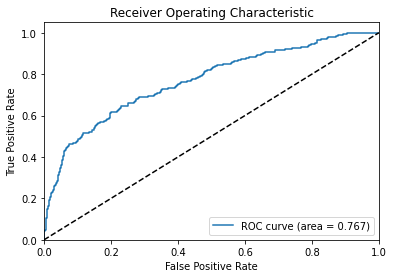

In [17]:
# Plot the ROC curve by giving appropriate names for title and axes. 
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
probs = lr.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model. 


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 

In [18]:
lr2 = LogisticRegression(C = 0.1, penalty = 'l1', solver='liblinear')
lr2.fit(X_train, y_train)
y_preds2 = lr2.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds2)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds2)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds2)*100,2)}%')

Precision is 68.05%
Recall is 42.59%
Accuracy is 82.53%


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 

In [19]:
lr3 = LogisticRegression(C = 0.5, penalty = 'l1', solver='liblinear')
lr3.fit(X_train, y_train)
y_preds3 = lr3.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds3)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds3)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds3)*100,2)}%')

Precision is 66.86%
Recall is 43.33%
Accuracy is 82.36%


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [20]:
lr4 = LogisticRegression(C = 0.1, penalty = 'l2', max_iter = 200)
lr4.fit(X_train, y_train)
y_preds4 = lr4.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds4)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds4)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds4)*100,2)}%')

Precision is 66.28%
Recall is 42.22%
Accuracy is 82.11%


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [21]:
lr5 = LogisticRegression(C = 0.5, penalty = 'l2', max_iter = 1000, solver='saga')
lr5.fit(X_train, y_train)
y_preds5 = lr5.predict(X_val)
print(f'Precision is {round(my_precision(y_val.values, y_preds5)*100,2)}%')
print(f'Recall is {round(my_recall(y_val.values, y_preds5)*100,2)}%')
print(f'Accuracy is {round(my_accuracy(y_val.values, y_preds5)*100,2)}%')

Precision is 66.48%
Recall is 43.33%
Accuracy is 82.27%


Q. Which of the above models is better?<br> 
Ans- Model lr3 (with hyperparameter 'C' = 0.5 and penalty 'l1') and Model lr5 (with hyperparameter 'C' = 0.5 and penalty 'l2') have the highest recall of 43.33%. Since Model lr3 has greater precision and accuracy as well, we choose lr3 for our model.

# Test set

In [29]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###

# return the prediction as "y_pred"

y_pred = lr3.predict(X_test)
print(y_pred)

# convert y_pred array into a dataframe and print output
y_pred_df = pd.DataFrame(y_pred, columns = ['Default prediction'])
print(y_pred_df.head())

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 

# Dataset 2
The dataset is the "Pima Indians Diabetes Dataset".

There are two data files: "Diabetes_training.csv" and "Diabetes_Xtest.csv"
Both files have the following fields, except quality which is not available in "Diabetes_Xtest.csv".

Features:

1 - pregnant:	Number of times pregnant <br>
2 - glucose:	Plasma glucose concentration (glucose tolerance test) <br>
3 - pressure:	Diastolic blood pressure (mm Hg) <br>
4 - triceps:	Triceps skin fold thickness (mm) <br>
5 - insulin	2-Hour serum insulin (mu U/ml) <br>
6 - mass:	Body mass index (weight in kg/(height in m)\^2) <br>
7 - pedigree:	Diabetes pedigree function <br>
8 - age:	Age (years)<br>

Target:

diabetes: ('neg','pos')

Training dataset, "Diabetes_training.csv", contains 576 rows and 9 columns. This is the training set containing both of the features and the target.
Test dataset, "Diabetes_Xtest.csv", contains 192 rows and 8 columns. This is the test set which only contains the features.
Prediction task is to determine the test for diabetes. 


In [23]:
# Load your training data set and test data
uploaded2 = files.upload()

diabetes_train = pd.read_csv('Diabetes_training.csv')
diabetes_test = pd.read_csv('Diabetes_Xtest.csv')
diabetes_train.head()

Saving Diabetes_training.csv to Diabetes_training.csv
Saving Diabetes_Xtest.csv to Diabetes_Xtest.csv


,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,13,129,0,30,0,39.9,0.569,44,pos
1,9,184,85,15,0,30.0,1.213,49,pos
2,3,193,70,31,0,34.9,0.241,25,pos
3,4,146,78,0,0,38.5,0.520,67,pos
4,3,174,58,22,194,32.9,0.593,36,pos


In [91]:
# Split training data into X and y
X = diabetes_train.iloc[:,:8]
y = diabetes_train.iloc[:,8:]

Standardize the features on training and test set.

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
X.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,2.687535,0.259804,-3.502800,0.606526,-0.674278,1.044804,0.250184,0.893537
1,1.503807,1.961746,0.832204,-0.326425,-0.674278,-0.237179,2.086872,1.314369
2,-0.271785,2.240245,0.067203,0.668723,-0.674278,0.397337,-0.685272,-0.705624
3,0.024147,0.785859,0.475204,-1.259376,-0.674278,0.863513,0.110436,2.829364
4,-0.271785,1.652302,-0.544797,0.108952,0.926898,0.138351,0.318632,0.220206


In [93]:
X_test = pd.DataFrame(sc.transform(diabetes_test), columns = diabetes_test.columns)
X_test.head()

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
0,-0.863649,-0.977972,-0.136797,0.171149,0.101549,-0.483217,-0.896320,-1.042290
1,0.320079,-0.142473,0.271203,-1.259376,-0.674278,-0.806950,-0.799352,-0.284792
2,-0.271785,-1.318360,-0.952798,0.730920,0.052028,-0.107686,-0.665308,-0.621458
3,1.207875,0.136026,1.393204,-1.259376,-0.674278,-4.121977,-0.710940,1.735201
4,1.799739,1.466635,0.271203,-1.259376,-0.674278,0.798766,0.158920,0.051873


Splitting training data into training and validation set (the code has been provided)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=20)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((403, 8), (173, 8), (403, 1), (173, 1))

### Decision Tree
From sklearn.tree used DecisionTreeClassifier to build a classification model with default parameters.

In [95]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
clf = DecisionTreeClassifier(random_state = 30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [96]:
### Make predictions on the training data
y_pred_train = clf.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data. 

In [97]:
# Print accuracy, precision and recall for the predictions made on the training data.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(f'Accuracy is {round(accuracy_score(y_train, y_pred_train)*100,2)}%')
print(f'Precision is {round(precision_score(y_train, y_pred_train, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall is {round(recall_score(y_train, y_pred_train, average="binary", pos_label="pos")*100,2)}%')

Accuracy is 100.0%
Precision is 100.0%
Recall is 100.0%


In [98]:
### Make predictions on the validation data
y_pred_val = clf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [99]:

accuracy_dt = accuracy_score(y_val, y_pred_val)*100
precision_dt = precision_score(y_val, y_pred_val, average="binary", pos_label="pos")*100
recall_dt = recall_score(y_val, y_pred_val, average="binary", pos_label="pos")*100

print(f'Accuracy is {round(accuracy_score(y_val, y_pred_val)*100,2)}%')
print(f'Precision is {round(precision_score(y_val, y_pred_val, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall is {round(recall_score(y_val, y_pred_val, average="binary", pos_label="pos")*100,2)}%')

Accuracy is 72.25%
Precision is 53.23%
Recall is 63.46%


Plot ROC curve and obtain AUC for predictions on the validation data.

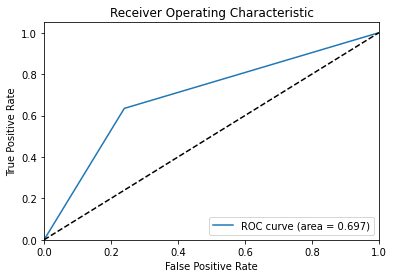

In [100]:
# Plot the ROC curve by giving appropriate names for title and axes. 

probs = clf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, preds, pos_label = 'pos')
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - This model has low bias and high variance. This can be explained by the high performance metrics in the training dataset since we are using all the features in the dataset. However, the model has high variance which can be seen from the decline in performance metrics when the model is run on the validation dataset. In other words, we are heavily overfitting the model.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble used RandomForestClassifier to build a classification model with default parameters.

In [101]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
rf = RandomForestClassifier(random_state = 30)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=30)

In [102]:
### Make predictions on the training data
y_train_pred = rf.predict(X_train)


Print accuracy, precision and recall for the predictions made on the training data.

In [103]:
print(f'Accuracy is {round(accuracy_score(y_train, y_train_pred)*100,2)}%')
print(f'Precision is {round(precision_score(y_train, y_train_pred, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall is {round(recall_score(y_train, y_train_pred, average="binary", pos_label="pos")*100,2)}%')

Accuracy is 100.0%
Precision is 100.0%
Recall is 100.0%


In [105]:
### Make predictions on the validation data

y_val_pred = rf.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [108]:

accuracy_rf = accuracy_score(y_val, y_val_pred) * 100
precision_rf = precision_score(y_val, y_val_pred, average="binary", pos_label="pos") * 100
recall_rf = recall_score(y_val, y_val_pred, average="binary", pos_label="pos") * 100

print(f'Accuracy is {round(accuracy_score(y_val, y_val_pred)*100,2)}%')
print(f'Precision is {round(precision_score(y_val, y_val_pred, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall is {round(recall_score(y_val, y_val_pred, average="binary", pos_label="pos")*100,2)}%')

Accuracy is 76.88%
Precision is 60.0%
Recall is 69.23%


Plot ROC curve and obtain AUC for the validation predictions

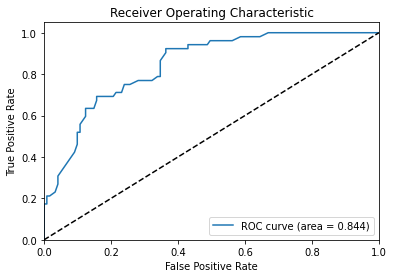

In [109]:
# Plot the ROC curve by giving appropriate names for title and axes. 


probs = rf.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, preds, pos_label = 'pos')
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()




**Bias & Variance tradeoff**

Bias is the difference between the predicted value and the true value. Variance is the variability of model’s prediction for a given dataset  which tells us the spread of our data. 
Model with high bias pays very little attention to the training data and oversimplifies the model. It leads to high error on training and test data. Model with high variance pays a lot of attention to training data and does not generalize on unseen datasets. These models perform well on training data but have high error rates on test datasets.

**Better model: Random Forest or Decision Tree?**

In the above cases, both decision trees and random forest have low bias and high variance as indicated by the performance on the training dataset (accuracy, precision and recall of 100%) and subsequent reduction in performance on the validation sets. However, the random forest is an improvement over the decision tree and is better in terms of bias-variance tradeoff for the following reasons:

a)	The random forest is an aggregation of several weaker decision tree models, which only uses a random subset of the features, making the decision trees decorrelated and therefore, the final random forest model more robust. As a result, the helps with the problem of overfitting and has lower variance when compared to the standalone decision tree model.

b)	This improvement in performance can be seen from the F1 score and Area under the ROC curve (AUC). The decision tree model has an AUC of 69.7% and F1 score of 57.89% while the random forest has an AUC of 84.4% and F1 score of 64.29%.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 

In [110]:
from sklearn.model_selection import GridSearchCV

In [78]:
# In the below dictionary, filled in the list of values that you want to try out for each parameter

param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [79]:
rf = RandomForestClassifier(random_state=30)

In [80]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1)

In [81]:
### Fit on the training data with all sets of parameters.

grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=1)

Display the parameters of the best model.

In [82]:
# Print the best parameters

grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [83]:
# Print the best score
grid_search.best_score_

0.7965432098765431

In [91]:
### Make predictions on the training set and display accuracy, precision and recal using the best model
### Make predictions on the validation set and display accuracy, precision and recall using the best model
ytrain_pred_final = grid_search.best_estimator_.predict(X_train)
yval_pred_final = grid_search.best_estimator_.predict(X_val)

### Make predictions on the training set and display accuracy, precision and recall using the best model

print(f'Accuracy for the training set is {round(accuracy_score(y_train, ytrain_pred_final)*100,2)}%')
print(f'Precision for the training set is {round(precision_score(y_train, ytrain_pred_final, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall for the training set is {round(recall_score(y_train, ytrain_pred_final, average="binary", pos_label="pos")*100,2)}%')

### Make predictions on the validation set and display accuracy, precision and recall using the best model

print()
print(f'Accuracy for the validation set is {round(accuracy_score(y_val, yval_pred_final)*100,2)}%')
print(f'Precision for the validation set is {round(precision_score(y_val, yval_pred_final, average="binary", pos_label="pos")*100,2)}%')
print(f'Recall for the validation set is {round(recall_score(y_val, yval_pred_final, average="binary", pos_label="pos")*100,2)}%')



Accuracy for the training set is 93.3%
Precision for the training set is 92.96%
Recall for the training set is 88.59%

Accuracy for the validation set is 79.19%
Precision for the validation set is 64.29%
Recall for the validation set is 69.23%


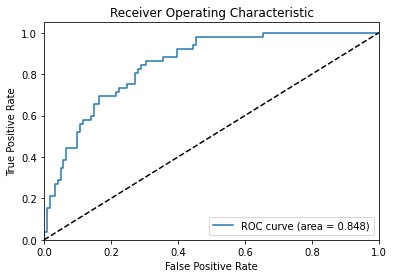

In [92]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes. 

probs = grid_search.best_estimator_.predict_proba(X_val)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_val, preds, pos_label = 'pos')
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#### Test
Choose the best hyperparameter values from the previous section. Use this random forest model to make predictions on test set.

In [93]:
# Construct your final random forest using the best hyperparameters obtained above

# return the prediction as "y_pred2"

y_preds2 = grid_search.best_estimator_.predict(X_test)
y_preds2

In [ ]:
#end